In [1]:
import os
import math
import random
import warnings
import numpy as np
import pandas as pd 
from sklearn import metrics
from matplotlib import pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"Estimated_neh_numbers_combined_1_.csv")
# data=pd.read_csv(r"Estimated_neh_numbers_combined_40.csv")
# data=data[data.T_NEH<45]
# data=data[data.APE_RMSE < 0.01]
print(data.shape)
data=data.dropna()
print(data.shape)

(1885, 21)
(1881, 21)


In [3]:
ck={'Q':3.67,'N':0.69,'S':1.61,'G':1.34,'T':0.10,'A':4.59,'D':2.55,'P':0.57,'M':1.02,'V':0.78,'E':3.67,
    'H':1.40,'K':0.12,'L':1.30,'I':0.76,'F':0.84,'C':1.53,'Y':0.75,'R':1.36,'W':0.00,}
def get_comm_neh(pep):
    return sum([ck[aa] for aa in pep.upper()])
print(get_comm_neh('NLLSVAYK'))
data.T_NEH=[get_comm_neh(pep) for pep in data.Peptide]
data.head()

11.139999999999999


,Protein,Peptide,Charge,T_NEH,Asym_NEH,MPE_NEH,APE_NEH,Asym_RMSE,MPE_RMSE,APE_RMSE,...,sd_rmse,il_neh,il_rmse,i0_0,i1_0,i2_0,i0_31,i1_31,i2_31,two_param_k
0,1433B_MOUSE,YLILNATQAESK,2,23.15,24.462842,18.906177,21.600010,0.011740,0.008535,0.003967,...,0.004305,20,0.004599,0.45538,0.34173,0.14472,0.215230,0.331898,0.251758,0.0
1,1433B_MOUSE,TAFDEAIAELDTLNEESYK,2,41.12,45.480054,50.801908,37.600071,0.014830,0.026944,0.010449,...,0.021536,33,0.019904,0.29105,0.33942,0.21781,0.090027,0.196719,0.267604,0.0
2,1433B_MOUSE,TAFDEAIAELDTLNEESYK,3,41.12,50.213182,50.765441,45.400101,0.016146,0.016828,0.018673,...,0.024652,39,0.023065,0.29105,0.33942,0.21781,0.070828,0.178661,0.233706,0.0
3,1433B_MOUSE,DNLTLWTSENQGDEGDAGEGEN,2,42.43,61.819096,50.557648,47.000107,0.028648,0.014232,0.015497,...,0.019778,42,0.016758,0.28024,0.33350,0.22155,0.062242,0.163154,0.247980,0.0
4,1433E_MOUSE,YLAEFATGNDRK,2,21.90,34.518651,23.394706,22.000011,0.040505,0.005406,0.003363,...,0.003363,22,0.002629,0.44746,0.34367,0.14816,0.211961,0.325644,0.258089,0.0


In [4]:
data.columns

Index(['Protein', 'Peptide', 'Charge', 'T_NEH', 'Asym_NEH', 'MPE_NEH',
       'APE_NEH', 'Asym_RMSE', 'MPE_RMSE', 'APE_RMSE', 'sd_neh', 'sd_rmse',
       'il_neh', 'il_rmse', 'i0_0', 'i1_0', 'i2_0', 'i0_31', 'i1_31', 'i2_31',
       'two_param_k'],
      dtype='object')

In [5]:
(100*data[data.Asym_RMSE < 0.01].shape[0]/data.shape[0],
100*data[data.APE_RMSE < 0.01].shape[0]/data.shape[0],
100*data[data.MPE_RMSE < 0.01].shape[0]/data.shape[0])

(56.03402445507709, 71.07921318447634, 45.34821903242956)

In [6]:
(
data[data.APE_RMSE < 0.01].shape[0],
data[data.MPE_RMSE < 0.01].shape[0],
data[data.Asym_RMSE < 0.01].shape[0],)

(1337, 853, 1054)

In [7]:
100*data[data.MPE_RMSE < 0.01].shape[0]/data.shape[0]

45.34821903242956

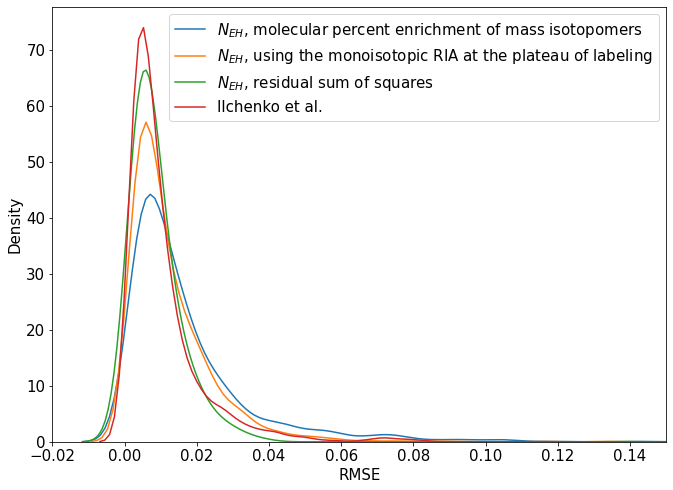

In [8]:
import numpy as np
import seaborn as sns
plt.rc('font', size=15) 
plt.figure(figsize=(11,8))
sns.kdeplot(data.MPE_RMSE, bw=0.2,label=(r"$N_{EH}$, molecular percent enrichment of mass isotopomers"))
sns.kdeplot(data.Asym_RMSE, bw=0.25,label=(r"$N_{EH}$, using the monoisotopic RIA at the plateau of labeling"))
sns.kdeplot(data.APE_RMSE, bw=0.55,label=(r"$N_{EH}$, residual sum of squares"))
sns.kdeplot(data.il_rmse, bw=0.2,label='Ilchenko et al.')
plt.xlabel('RMSE')
plt.legend()
plt.xlim([-0.02,0.15])
plt.savefig("rmse_lv.jpeg",dpi=900,bbox_inches='tight')

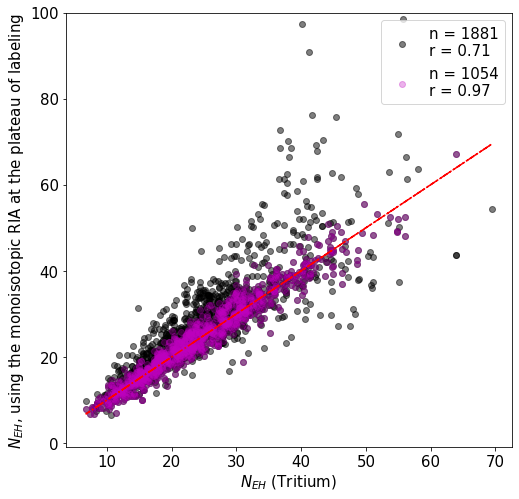

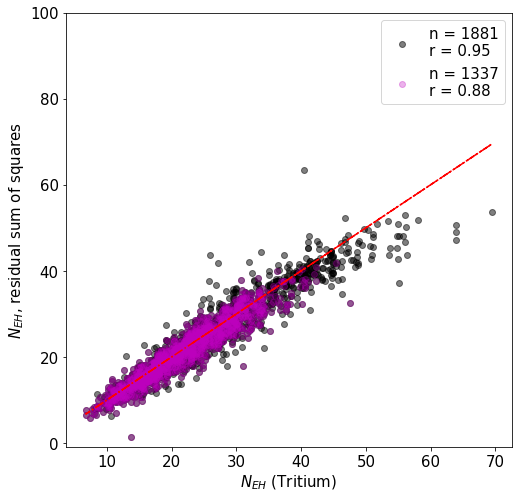

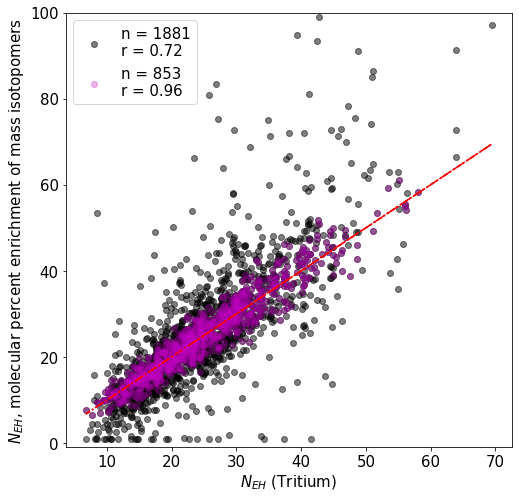

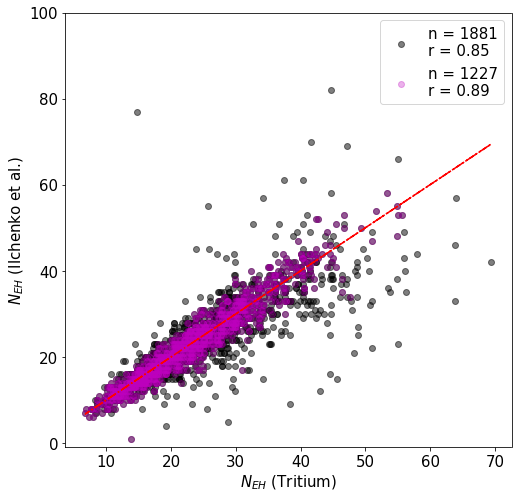

In [9]:
res=[]

plt.rc('font', size=15) 
plt.figure(figsize=(8,8))

plt.scatter(data.T_NEH,data.Asym_NEH,alpha=0.5,
            label=f'n = {data.shape[0]}\n' + 'r = '+'{0:.2f}'.format(np.corrcoef(data.T_NEH,data.Asym_NEH)[0][1]),c='k')

temp_data=data[data.Asym_RMSE < 0.01]
plt.scatter(temp_data.T_NEH,temp_data.Asym_NEH,alpha=0.3,
            label=f'n = {temp_data.shape[0]}\n' + 'r = '+'{0:.2f}'.format(np.corrcoef(temp_data.T_NEH,temp_data.Asym_NEH)[0][1]),c='m')


plt.plot(data.T_NEH,data.T_NEH,ls="-.",c='r')
plt.xlabel(r"$N_{EH}$ (Tritium)")
plt.ylabel(r"$N_{EH}$, using the monoisotopic RIA at the plateau of labeling")
plt.legend()
plt.ylim([-1,100])
plt.savefig("asym_lv.jpeg",dpi=900,bbox_inches='tight')
plt.show()
res.append( (data.T_NEH - data.Asym_NEH)/data.T_NEH)


plt.rc('font', size=15) 
plt.figure(figsize=(8,8))
plt.scatter(data.T_NEH,data.APE_NEH,alpha=0.5,
            label=f'n = {data.shape[0]}\n' + 'r = '+'{0:.2f}'.format(np.corrcoef(data.T_NEH,data.APE_NEH)[0][1]),c='k')

temp_data=data[data.APE_RMSE < 0.01]
plt.scatter(temp_data.T_NEH,temp_data.APE_NEH,alpha=0.3,
            label=f'n = {temp_data.shape[0]}\n' + 'r = '+'{0:.2f}'.format(np.corrcoef(temp_data.T_NEH,temp_data.Asym_NEH)[0][1]),c='m')


plt.plot(data.T_NEH,data.T_NEH,ls="-.",c='r')

plt.xlabel(r"$N_{EH}$ (Tritium)")
plt.ylabel(r"$N_{EH}$, residual sum of squares")
plt.legend()
plt.ylim([-1,100])
plt.savefig("ape_lv.jpeg",dpi=900,bbox_inches='tight')
plt.show()
res.append( (data.T_NEH - data.APE_NEH)/data.T_NEH)


plt.rc('font', size=15) 
plt.figure(figsize=(8,8))
plt.scatter(data.T_NEH,data.MPE_NEH.astype('float'),alpha=0.5,
            label=f'n = {data.shape[0]}\n' + 'r = '+'{0:.2f}'.format(np.corrcoef(data.T_NEH,data.MPE_NEH.astype('float'))[0][1]),c='k')

temp_data=data[data.MPE_RMSE < 0.01]
plt.scatter(temp_data.T_NEH,temp_data.MPE_NEH.astype('float'),alpha=0.3,
            label=f'n = {temp_data.shape[0]}\n' + 'r = '+'{0:.2f}'.format(np.corrcoef(temp_data.T_NEH,temp_data.MPE_NEH.astype('float'))[0][1]),c='m')

plt.plot(data.T_NEH,data.T_NEH,ls="-.",c='r')
plt.xlabel(r"$N_{EH}$ (Tritium)")
plt.ylabel(r"$N_{EH}$, molecular percent enrichment of mass isotopomers")
plt.legend()
plt.ylim([-1,100])
plt.savefig("mpe_lv.jpeg",dpi=900,bbox_inches='tight')
plt.show()
res.append( (data.T_NEH - data.MPE_NEH.astype('float'))/data.T_NEH)

# plt.rc('font', size=15) 
# plt.figure(figsize=(8,8))
# plt.scatter(data.T_NEH,data.sd_neh,alpha=0.5,label='sd',c='k')
# plt.plot(data.T_NEH,data.T_NEH,ls="-.",c='r')
# plt.xlabel("NEH (Tritium)")
# plt.ylabel("Estimation of NEH using the \nmonoisotopic RIA at the plateau of labeling")
# plt.legend()
# plt.show()

plt.rc('font', size=15) 
plt.figure(figsize=(8,8))
plt.scatter(data.T_NEH,data.il_neh,alpha=0.5,
            label=f'n = {data.shape[0]}\n' + 'r = '+'{0:.2f}'.format(np.corrcoef(data.T_NEH,data.il_neh)[0][1]),c='k')

temp_data=data[data.il_rmse < 0.01]
plt.scatter(temp_data.T_NEH,temp_data.il_neh,alpha=0.3,
            label=f'n = {temp_data.shape[0]}\n' + 'r = '+'{0:.2f}'.format(np.corrcoef(temp_data.T_NEH,temp_data.Asym_NEH)[0][1]),c='m')

plt.plot(data.T_NEH,data.T_NEH,ls="-.",c='r')
plt.xlabel(r"$N_{EH}$ (Tritium)")
plt.ylabel(r"$N_{EH}$ (Ilchenko et al.)")
plt.legend()
plt.ylim([-1,100])
plt.savefig("lich_lv.jpeg",dpi=900,bbox_inches='tight')
plt.show()
res.append( (data.T_NEH - data.il_neh)/data.T_NEH)

In [10]:
# data=pd.read_csv(r"C:\Workplace\Python\AnalysisForThePaper\NEH\second_round\D2O_NEH\neh_from_formula.csv")
# data.columns

In [11]:
# plt.scatter(data['data.T_NEH'],data.neh,alpha=0.5,label='il_neh',c='k')
# plt.plot(data['data.T_NEH'],data['data.T_NEH'],ls="-.",c='r')
# plt.legend()
# plt.show()

In [12]:
# plt.rc('font', size=15) 
# plt.figure(figsize=(8,8))
# plt.scatter(data['data.T_NEH'],data.neh,alpha=0.5,
#             label='r = '+'{0:.2f}'.format(np.corrcoef(data['data.T_NEH'],data.neh)[0][1]),c='k')
# plt.plot(data['data.T_NEH'],data['data.T_NEH'],ls="-.",c='r')
# plt.xlabel("NEH (Tritium)")
# plt.ylabel("NEH (using the Simultaneous \nestimation of label enrichment and NEH method)")
# plt.legend()
# plt.savefig("simul.jpeg",dpi=900,bbox_inches='tight')
# plt.show()

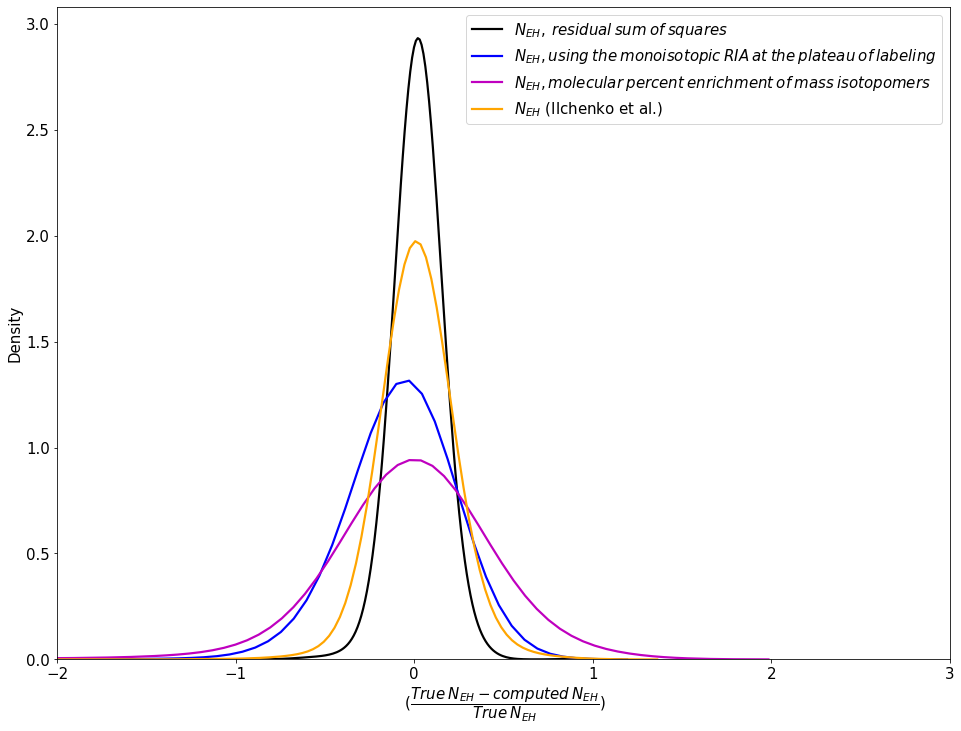

In [13]:
bw=0.75
bins=7000
lw=2.2
mtd="scott" 

plt.rc('font', size=15) 
plt.figure(figsize=(16,12))

sns.distplot(res[1], 
             hist = False,bins=bins, kde = True,color='k',
                 hist_kws={'alpha':0.3},
                     kde_kws = {'shade': False, 'linewidth': lw,'bw':bw,'bw_method':mtd} ,
             label=r"${N_{EH}},\:residual \:sum \:of \:squares$")

sns.distplot(res[0], 
             hist = False,bins=bins, kde = True,color='b',
                 hist_kws={'alpha':0.3},
                     kde_kws = {'shade': False, 'linewidth': lw,'bw':bw,'bw_method':mtd} ,
             label=r"${N_{EH}},using\: the\: monoisotopic\: RIA\: at\: the\: plateau\: of\: labeling$") 


sns.distplot(res[2], 
             hist = False,bins=bins, kde = True,color='m',
                 hist_kws={'alpha':0.3},
                     kde_kws = {'shade': False, 'linewidth': lw,'bw':bw,'bw_method':mtd} ,
             label=r"${N_{EH}},molecular\:percent\:enrichment\:of\:mass\:isotopomers$") 


sns.distplot(res[3], 
             hist = False,bins=bins, kde = True,color='orange',
                 hist_kws={'alpha':0.3},
                     kde_kws = {'shade': False, 'linewidth': lw,'bw':bw,'bw_method':mtd} ,
             label=r"$N_{EH}$ (Ilchenko et al.)") 

plt.xlabel(r' ($\dfrac { { True\: {N_{EH}} }- computed \:{N_{EH}} } { True\: {N_{EH}}}$)')
plt.legend(loc='upper right')
plt.xlim([-2,3])
# plt.vlines(x=0,ymin=0,ymax=7.7,ls="-.",color='r',alpha=0.7)

plt.savefig("density_4_lv.jpeg",dpi=900,bbox_inches='tight')

In [14]:
# aa_sh_name

In [15]:
aa_sh_name={'Q':'Gln (Q)','N':'Asn (N)','S':'Ser (S)','G':'Gly (G)','T':'Thr (T)','A':'Ala (A)','D':'Asp (D)','P':'Pro (P)',
            'M':'Met (M)','V':'Val (V)','E':'Glu (E)','H':'His (H)','K':'Lys (K)','L':'Leu (L)','I':'Ile (I)','F':'Phe (F)',
            'C':'Cys (C)','Y':'Tyr (Y)','R':'Arg (R)','W':'Trp (W)',}

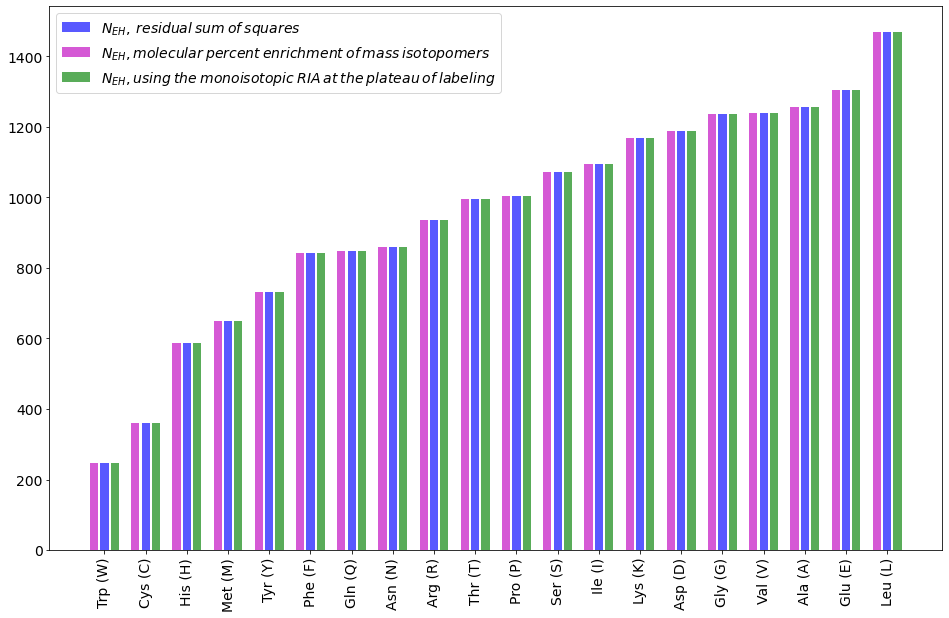

In [16]:
plt.rc('font', size=14) 
plt.figure(figsize=(16,10)) 
def plot_aa_count(data,filename,offset=0):
    color =['m','b','g'][offset]
    label=[r"${N_{EH}},molecular\:percent\:enrichment\:of\:mass\:isotopomers$",
           r"${N_{EH}},\:residual \:sum \:of \:squares$",
           r"${N_{EH}},using\: the\: monoisotopic\: RIA\: at\: the\: plateau\: of\: labeling$"][offset]
    res=dict()
    for pep in list(data['Peptide']):
        visited=set()
        for c in (pep):
            if c not in visited:
                res[c.upper()]=res.get(c.upper(),0)+1
                visited.add(c)
    res=np.array(sorted(res.items(),key= lambda item:item[1],reverse=False)) 
    
    temp=range(0,80,4)
    plt.bar([x+offset for x in temp],[int(x) for x in (res[:,1])],color=color,alpha=0.65,label=label)
#     plt.xticks([x+offset-1 for x in temp],res[:,0])
    plt.xticks([x+offset-1 for x in temp],[aa_sh_name[x] for x in res[:,0]],rotation=90)

#     for index, value in enumerate([int(x) for x in (res[:,1])]):
#         plt.text(value, index,
#                  str(value))

#     plt.savefig(filename,dpi=900,bbox_inches='tight')
#     plt.show()
plot_aa_count(data,"ape_aa_count.jpeg",1)
plot_aa_count(data,"mpe_aa_count.jpeg",0)
plot_aa_count(data,"asymp_aa_count.jpeg",2)

plt.legend()
plt.savefig("count_aa_eq.jpeg",dpi=900,bbox_inches='tight')

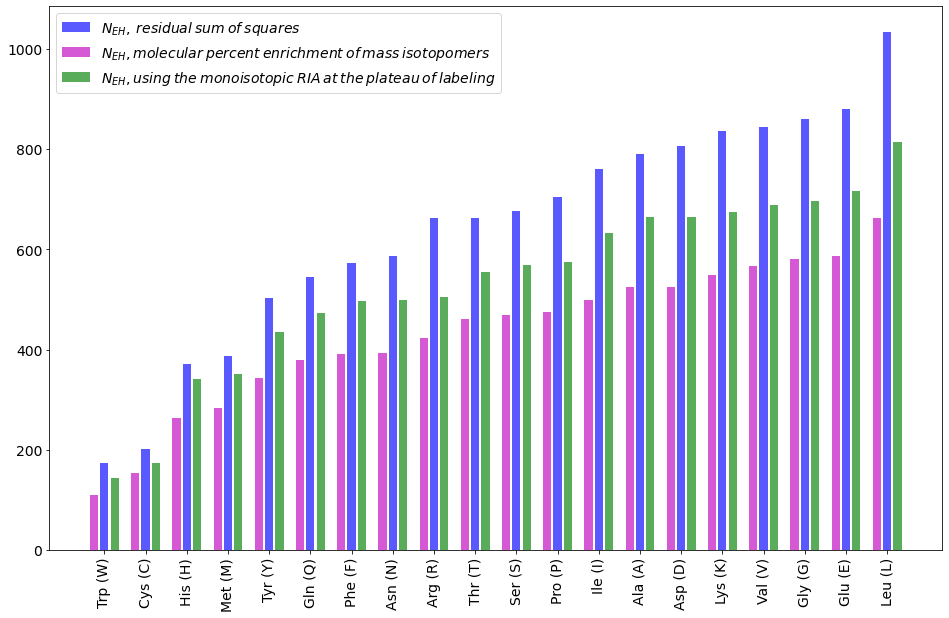

In [17]:
plt.rc('font', size=14) 
plt.figure(figsize=(16,10))

plot_aa_count(data[data.APE_RMSE < 0.01],"ape_aa_count.jpeg",1)
plot_aa_count(data[data.MPE_RMSE < 0.01],"mpe_aa_count.jpeg",0)
plot_aa_count(data[data.Asym_RMSE < 0.01],"asymp_aa_count.jpeg",2)

plt.legend()
plt.savefig("liverpool_count_aa_eq.jpeg",dpi=900,bbox_inches='tight')